<a href="https://colab.research.google.com/github/NouhailaJeddi/Semestre5_ML/blob/main/devoir3ByNJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLNN from scratch: Devoir 3 By Nouhaila JEDDI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [ ]:
#la fonction sigmoid et sa derivee

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

sigmoid_fnc = [sigmoid,sigmoid_derivative]

#la fonction ReLU et sa derivee

def ReLU(x):
    return x * (x > 0) 

def ReLU_derivative(x):
    return 1. * (x > 0)

relu_fnc = [ReLU, ReLU_derivative]

In [ ]:
class MultiLayerNN:

    #constructeur
    def __init__(self,input,hiden,output):
        np.random.seed(0) #définit la valeur de départ aléatoire à 0
        self.inputHiden_weights=np.random.rand(input,hiden) # init de weights couche caché
        self.outputHiden_weights=np.random.rand(hiden,output)# init de weights couche sourtie
        self.hiden_bias = np.random.rand(1,hiden) # init de bais couche caché
        self.output_bias = np.random.rand(1,output) # init de bais couche sortie
        self.learning_rate=0.01
          

    #la methode fit
    def fit(self, X, y, nb_iter=200, learning_rate=0.01,activation_function= sigmoid_fnc):
        self.activation_function=activation_function[0]
        self.activation_function_derivative=activation_function[1]
        yy = y
        y = y.reshape(-1,1)
        m = (nb_iter/10)
          
        for i in range(nb_iter):
            #hidden layer sum
            hidden_layer_sum = np.dot(X, self.inputHiden_weights) + self.hiden_bias
            #activation function
            hidden_layer_out = self.activation_function(hidden_layer_sum)
            
            #output layer
            output_layer_sum = np.dot(hidden_layer_out, self.outputHiden_weights) + self.output_bias
            #predicted value
            y_predicted = self.activation_function(output_layer_sum)
            
            #Backward
            dloss_dbias_out = (y_predicted - y) * self.activation_function_derivative(y_predicted)
            dloss_dw_out = hidden_layer_out.T.dot(dloss_dbias_out)
            
            dloss_dbias_h = (dloss_dbias_out).dot(self.outputHiden_weights.T) * self.activation_function_derivative(hidden_layer_out)
            dloss_dw_h = X.T.dot(dloss_dbias_h)

            #editor
            self.inputHiden_weights -= dloss_dw_h * learning_rate
            self.hiden_bias -=np.sum(dloss_dbias_h,axis = 0, keepdims = True) * learning_rate
            self.outputHiden_weights-= dloss_dw_out * learning_rate
            self.output_bias-= np.sum(dloss_dbias_out, axis = 0, keepdims = True) * learning_rate
            if (i % m == 0) :
                print(" Iteration ({}) -> Loss : {:.4f} || Accuracy : {:.4f} ".format(i, np.mean((y_predicted - yy)**2), (yy == self.predict(X)).mean()))


    #Une méthode de prédiction
    def predict(self, X):    
        #hiden layer
        inputHiden_sum = np.dot(X, self.inputHiden_weights) + self.hiden_bias
        output_hiden = self.activation_function(inputHiden_sum)
                
        #output layer
        output_sum = np.dot(output_hiden,self.outputHiden_weights) + self.output_bias
                
        #predicted value
        y_predicted = self.activation_function(output_sum)
                
        return np.round(y_predicted).reshape(1,-1)[0]

In [ ]:
rng = np.random.RandomState(0)
X   = rng.randn(300, 2)
y   = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),dtype=int)
X[:100]


array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [ ]:
y[:100]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

### Modèle Sigmoid :

 Iteration (0) -> Loss : 0.3897 || Accuracy : 0.4733 
 Iteration (1000) -> Loss : 0.3668 || Accuracy : 0.9367 
 Iteration (2000) -> Loss : 0.4017 || Accuracy : 0.9767 
 Iteration (3000) -> Loss : 0.4192 || Accuracy : 0.9833 
 Iteration (4000) -> Loss : 0.4283 || Accuracy : 0.9833 
 Iteration (5000) -> Loss : 0.4341 || Accuracy : 0.9867 
 Iteration (6000) -> Loss : 0.4384 || Accuracy : 0.9867 
 Iteration (7000) -> Loss : 0.4419 || Accuracy : 0.9867 
 Iteration (8000) -> Loss : 0.4449 || Accuracy : 0.9900 
 Iteration (9000) -> Loss : 0.4475 || Accuracy : 0.9900 


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


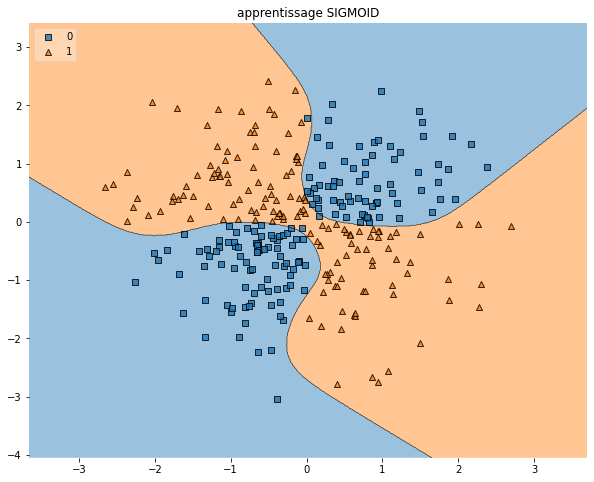

In [ ]:
model = MultiLayerNN(2,6,1)
model.fit(X, y, nb_iter=10000, learning_rate=0.01, activation_function=sigmoid_fnc)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("apprentissage SIGMOID")
plt.show()

### Modèle avec ReLU

 Iteration (0) -> Loss : 7.1883 || Accuracy : 0.3667 
 Iteration (10000) -> Loss : 0.4110 || Accuracy : 0.9467 
 Iteration (20000) -> Loss : 0.4155 || Accuracy : 0.9600 
 Iteration (30000) -> Loss : 0.4301 || Accuracy : 0.9600 
 Iteration (40000) -> Loss : 0.4396 || Accuracy : 0.9633 
 Iteration (50000) -> Loss : 0.4447 || Accuracy : 0.9633 
 Iteration (60000) -> Loss : 0.4491 || Accuracy : 0.9633 
 Iteration (70000) -> Loss : 0.4524 || Accuracy : 0.9633 
 Iteration (80000) -> Loss : 0.4549 || Accuracy : 0.9667 
 Iteration (90000) -> Loss : 0.4568 || Accuracy : 0.9667 


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


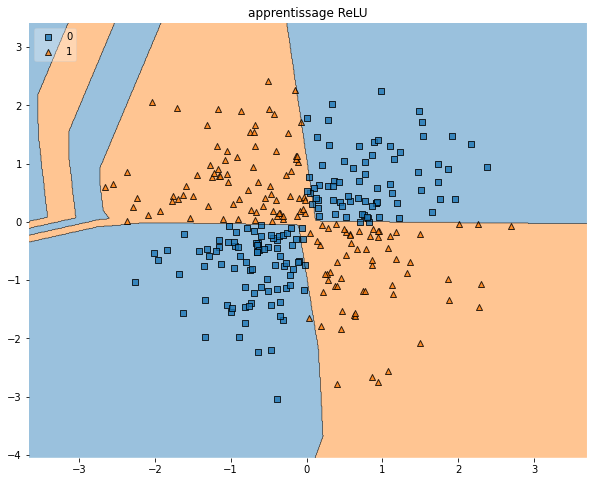

In [ ]:
model = MultiLayerNN(2,6,1)
model.fit(X, y, nb_iter=100000, learning_rate=0.0001, activation_function=relu_fnc)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("apprentissage ReLU")
plt.show()